# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations 1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#test_city = "Chicago"
record_count = 1
set_count = 1
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(5)

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    #added delay to stay under api limit
    time.sleep(1)
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)

        weather_json = weather_response.json()
        #print(weather_json)
        # #print(f"The temperature in Chicago is {temperature} C.")
        city_lat =  weather_json["coord"]["lat"]
        #print(f"The lat in {city} is {city_lat}.")
        city_lng = weather_json["coord"]["lon"]
        #print(f"The lon in {city} is {city_lng}.")
        city_max_temp = weather_json["main"]["temp_max"]
        #print(f"The max temp in {city} is {city_max_temp} C.")
        city_humidity = weather_json["main"]["humidity"]
        #print(f"The humidity in {city} is {city_humidity} .")
        city_clouds = weather_json["clouds"]["all"]
        #print(f"The clouds in {city} are {city_clouds}.")
        city_wind = weather_json["wind"]["speed"]
        #print(f"The wind speed in {city} is  {city_wind}.")
        city_country = weather_json["sys"]["country"]
        #print(f"The country of {city} is {city_country}.")
        city_date = weather_json["dt"]
        #city_date = datetime.fromtimestamp(city_date)
        #city_date = city_date.date()
        #print(f"The date in {city} is {city_date}.")
        

        city_data.append({"City": city, 
                                "Lat": city_lat, 
                                "Lng": city_lng, 
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kadnikov
Processing Record 2 of Set 1 | sorland
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | shitanjing
Processing Record 5 of Set 1 | port augusta
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | giddalur
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | yerbogachen
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | aginskoye
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | yanan
City not found. Skipping...
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | okhotsk
Processing Record 22 of Set 1 |

In [5]:
#city_data

In [6]:
# Convert the cities weather data into a Pandas DataFrame YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kadnikov,59.5022,40.3380,0.11,98,100,1.42,RU,1680378553
1,sorland,67.6670,12.6934,1.92,57,17,5.86,NO,1680378555
2,hilo,19.7297,-155.0900,27.93,77,75,2.24,US,1680378299
3,shitanjing,39.2342,106.3439,2.51,81,100,4.60,CN,1680378557
4,port augusta,-32.5000,137.7667,11.15,60,0,2.56,AU,1680378454


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kadnikov,59.5022,40.3380,0.11,98,100,1.42,RU,1680378553
1,sorland,67.6670,12.6934,1.92,57,17,5.86,NO,1680378555
2,hilo,19.7297,-155.0900,27.93,77,75,2.24,US,1680378299
3,shitanjing,39.2342,106.3439,2.51,81,100,4.60,CN,1680378557
4,port augusta,-32.5000,137.7667,11.15,60,0,2.56,AU,1680378454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

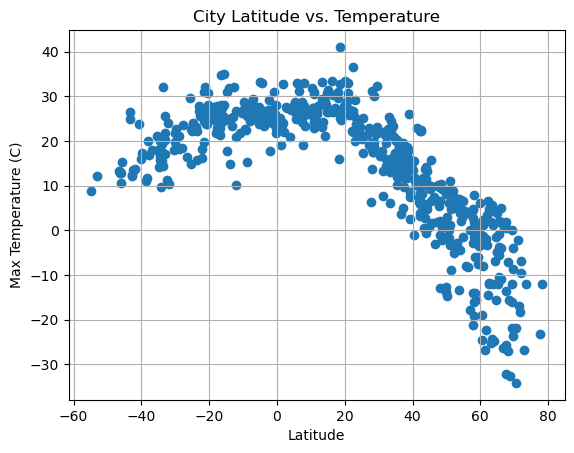

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

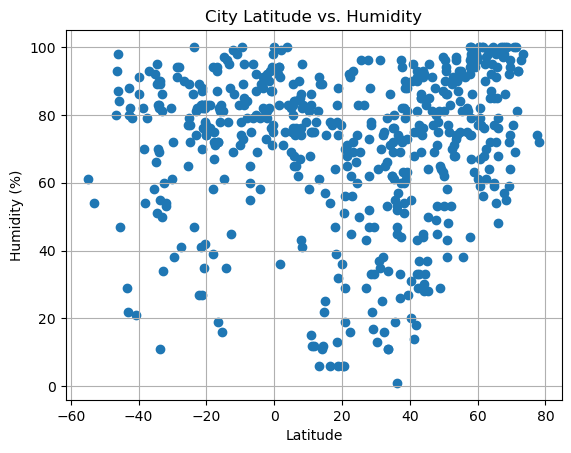

In [11]:
# Build the scatter plots for latitude vs. Humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

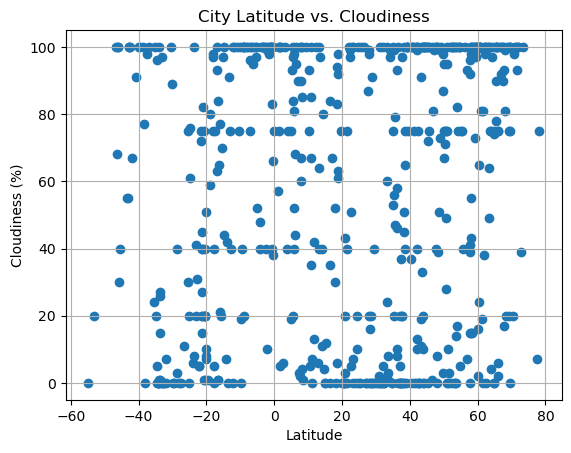

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

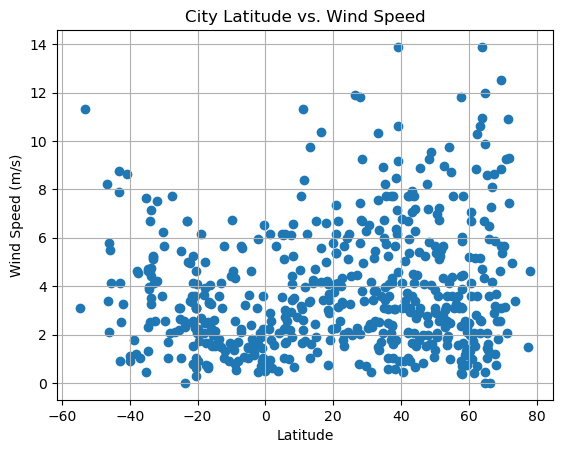

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linreg(xvalues, yvalues, xlabels, ylabels):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(xlabels)
    plt.ylabel(ylabels)
    plt.show()    

#do i need all four again with lin reg?

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kadnikov,59.5022,40.3380,0.11,98,100,1.42,RU,1680378553
1,sorland,67.6670,12.6934,1.92,57,17,5.86,NO,1680378555
2,hilo,19.7297,-155.0900,27.93,77,75,2.24,US,1680378299
3,shitanjing,39.2342,106.3439,2.51,81,100,4.60,CN,1680378557
7,giddalur,15.3500,78.9167,26.58,74,12,1.29,IN,1680378562


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<=0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port augusta,-32.5000,137.7667,11.15,60,0,2.56,AU,1680378454
5,castro,-24.7911,-50.0119,23.80,72,61,1.01,BR,1680378463
6,bluff,-46.6000,168.3333,13.22,80,100,8.23,NZ,1680378465
8,cidreira,-30.1811,-50.2056,21.73,61,89,6.23,BR,1680378419
9,cape town,-33.9258,18.4232,19.39,82,0,6.69,ZA,1680378356


###  Temperature vs. Latitude Linear Regression Plot

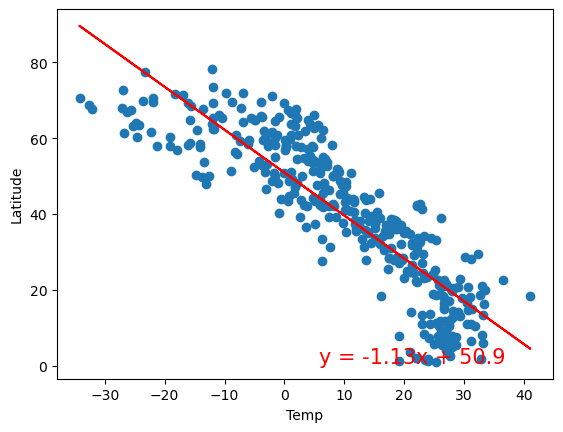

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], "Temp", "Latitude")

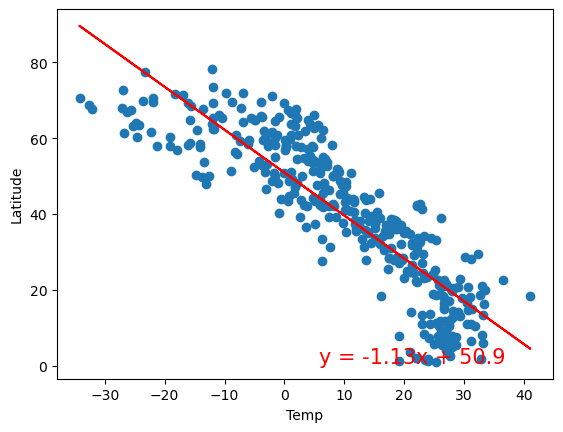

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"], "Temp", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

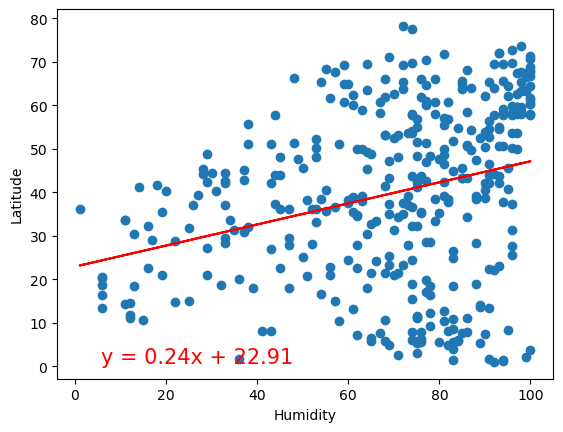

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df["Humidity"], northern_hemi_df["Lat"], "Humidity", "Latitude")

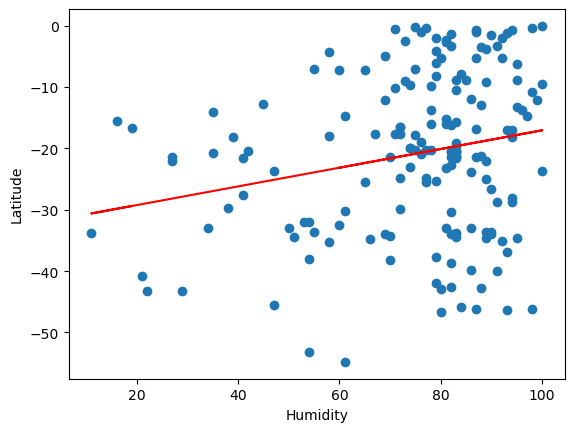

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
linreg(southern_hemi_df["Humidity"], southern_hemi_df["Lat"], "Humidity", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

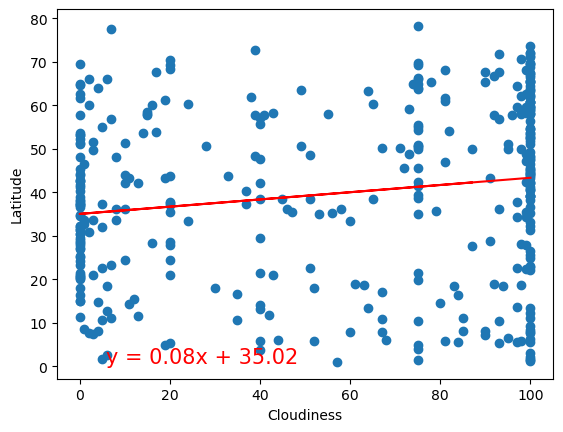

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"], "Cloudiness", "Latitude")

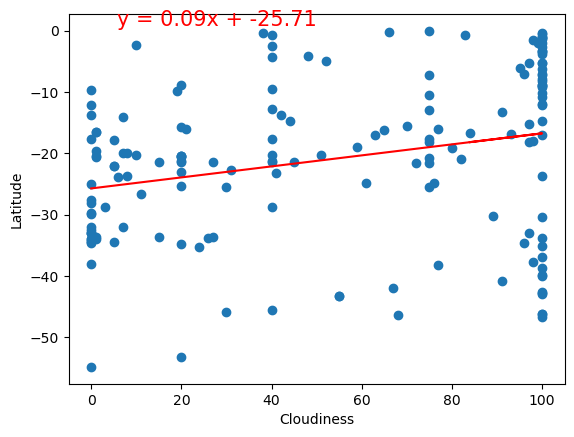

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
linreg(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"], "Cloudiness", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

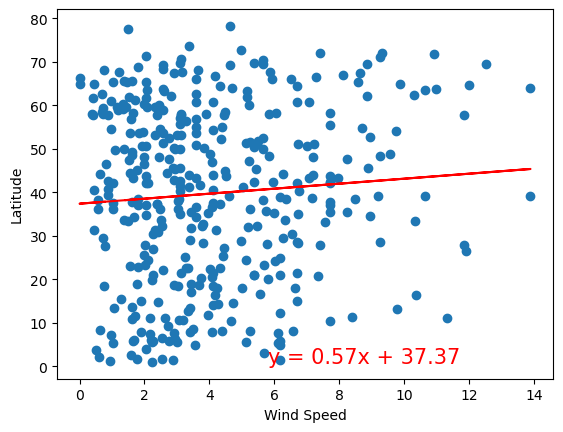

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
linreg(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"], "Wind Speed", "Latitude")

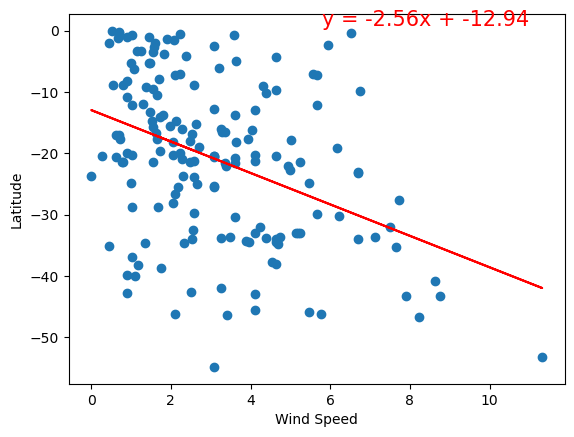

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
linreg(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"], "Wind Speed", "Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE